<a href="https://colab.research.google.com/github/1246hin/archive/blob/main/project/Spotify%20Recommendation/CatBoost_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 49kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
train=pd.read_csv("/content/drive/Shareddrives/Spotify Recommendation/Train.csv")
test=pd.read_csv("/content/drive/Shareddrives/Spotify Recommendation/Test.csv")

In [ ]:
train.head()

,Unnamed: 0,instrumentalness,speechiness,acousticness,mode,liveness,key,valence,loudness,duration_ms,target
0,1281,0.000000,0.0911,0.06460,0,0.250,8,0.593,-6.313,3.40,0
1,306,0.155000,0.0733,0.32100,0,0.110,1,0.587,-11.004,5.15,1
2,1006,0.013900,0.3170,0.28900,0,0.135,10,0.294,-17.402,4.01,1
3,495,0.241000,0.0396,0.00860,1,0.137,4,0.681,-10.022,3.97,1
4,1643,0.000562,0.0300,0.00626,1,0.297,11,0.463,-6.206,3.39,0


In [ ]:
print(len(train), len(test))

1815 202


In [ ]:
x_train=train.iloc[:, :-1]
y_train=train.iloc[:, -1:]
x_test=test.iloc[:, :-1]
y_test=test.iloc[:, -1:]

In [ ]:
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, 
                                                random_state=1, shuffle=True)

In [ ]:
print(len(x_train), len(x_val))

1452 363


# Baseline CatBoost

In [ ]:
#categorical_features_indices = [4, 6]
model=CatBoostClassifier(custom_loss=["Accuracy"], logging_level='Silent')

In [ ]:
model.fit(x_train, y_train,  eval_set=(x_val, y_val), logging_level="Verbose")

Learning rate set to 0.034747
0:	learn: 0.6120839	test: 0.6132674	best: 0.6132674 (0)	total: 50.9ms	remaining: 50.9s
1:	learn: 0.5430704	test: 0.5424209	best: 0.5424209 (1)	total: 53.6ms	remaining: 26.8s
2:	learn: 0.4798086	test: 0.4804432	best: 0.4804432 (2)	total: 56.5ms	remaining: 18.8s
3:	learn: 0.4191382	test: 0.4197361	best: 0.4197361 (3)	total: 59.2ms	remaining: 14.7s
4:	learn: 0.3746070	test: 0.3742765	best: 0.3742765 (4)	total: 61.9ms	remaining: 12.3s
5:	learn: 0.3349401	test: 0.3351056	best: 0.3351056 (5)	total: 64.6ms	remaining: 10.7s
6:	learn: 0.2914934	test: 0.2924467	best: 0.2924467 (6)	total: 67.2ms	remaining: 9.54s
7:	learn: 0.2632997	test: 0.2649081	best: 0.2649081 (7)	total: 70ms	remaining: 8.68s
8:	learn: 0.2400628	test: 0.2428037	best: 0.2428037 (8)	total: 72.8ms	remaining: 8.02s
9:	learn: 0.2155783	test: 0.2180269	best: 0.2180269 (9)	total: 77.1ms	remaining: 7.63s
10:	learn: 0.1946711	test: 0.1972200	best: 0.1972200 (10)	total: 80.5ms	remaining: 7.24s
11:	learn: 0.

# Evaluate

In [ ]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

[[100   0]
 [  0 102]]
1.0 1.0 1.0 1.0


In [ ]:
model.feature_importances_

array([90.68655111,  0.81050089,  1.81854729,  0.66871876,  0.37925093,
        1.61811161,  1.3746738 ,  0.8633726 ,  0.97796542,  0.80230759])

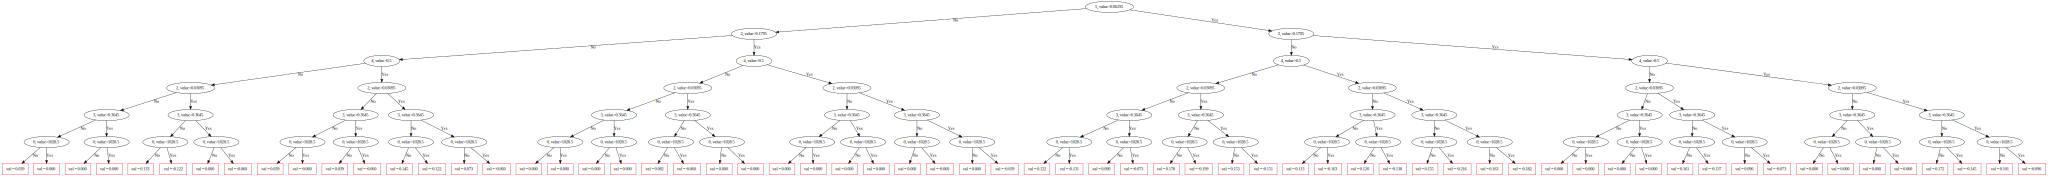

In [ ]:
model.plot_tree(tree_idx=0)